In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
Nsim = 20
FirstStim = 8.0
LastStim = 20.0
Mp = np.zeros((Nsim, 1))
Hp = np.zeros((Nsim, 1))
Stim = np.zeros((Nsim, 1))
emg = np.zeros([len(t), Nsim])

pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345869 synapses were built


In [4]:
for j  in xrange(0, Nsim):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.clock()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i])
        pools[2].atualizeAfferentPool(t[i])
    toc = time.clock()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    for k in xrange(0, len(pools)):
        pools[k].reset()

68.554799 seconds
[ 0.]
[ 0.]
70.066066 seconds
[ 0.]
[ 0.]
71.438244 seconds
[ 0.]
[ 0.]
71.723356 seconds
[ 0.]
[ 0.]
72.454591 seconds
[ 0.]
[ 0.]
72.656205 seconds
[ 0.]
[ 0.04649705]
70.370335 seconds
[ 0.]
[ 0.4014565]
72.738184 seconds
[ 0.]
[ 1.14262601]
74.030548 seconds
[ 1.44100414]
[ 1.91522845]
74.616791 seconds
[ 2.12209249]
[ 2.41448682]
74.948382 seconds
[ 2.84811153]
[ 2.46557826]
75.137315 seconds
[ 3.33108436]
[ 2.06306873]
75.475816 seconds
[ 3.84037851]
[ 1.46636484]
76.06358 seconds
[ 4.22372334]
[ 1.07535266]
76.041904 seconds
[ 4.45950114]
[ 0.57727642]
76.103086 seconds
[ 4.76736024]
[ 0.29417412]
76.643485 seconds
[ 4.83646756]
[ 0.08861469]
74.780806 seconds
[ 4.91315285]
[ 0.00711582]
76.527349 seconds
[ 4.9033182]
[  1.34289604e-07]
76.752114 seconds
[ 4.92011211]
[  1.34610387e-07]


<IPython.core.display.Javascript object>


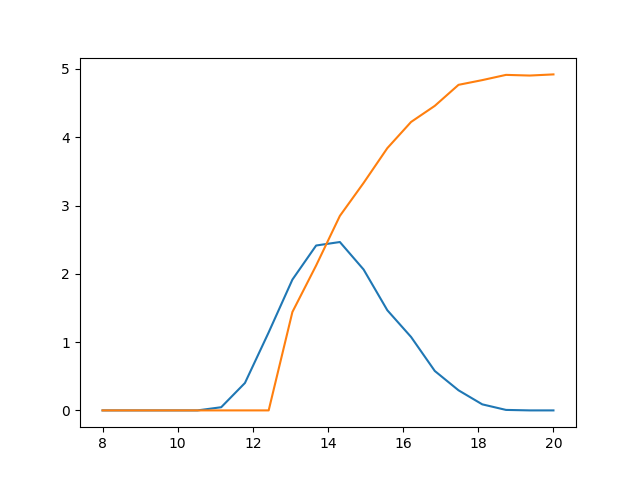

In [5]:
plt.figure()
plt.plot(Stim, Hp, Stim, Mp)

In [6]:
np.max(Hp)/np.max(Mp)

0.50112237400076998

In [7]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.44100414],
       [ 2.12209249],
       [ 2.84811153],
       [ 3.33108436],
       [ 3.84037851],
       [ 4.22372334],
       [ 4.45950114],
       [ 4.76736024],
       [ 4.83646756],
       [ 4.91315285],
       [ 4.9033182 ],
       [ 4.92011211]])

<IPython.core.display.Javascript object>


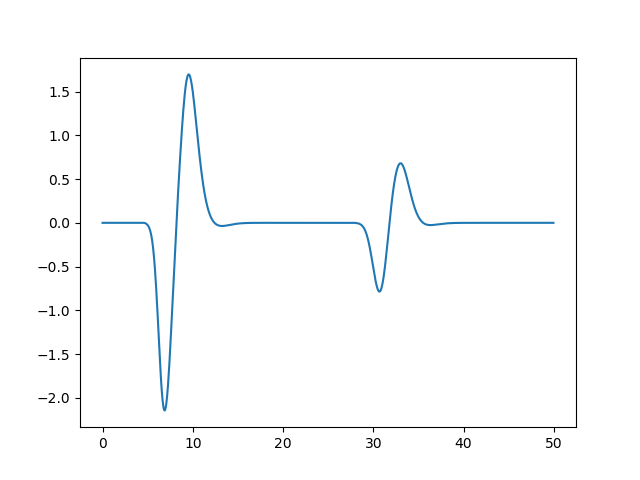

In [8]:
plt.figure()
plt.plot(t, emg[:,12])